In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
N = 200
blues = np.random.randint(low=0, high=100, size = (N,2))
oranges = np.random.randint(low=20, high=30, size = (N,2))

In [49]:
X = np.concatenate((blues, oranges))

In [50]:
X.shape

(400, 2)

In [51]:
y_blues = np.zeros(shape= (N,1))
y_oranges = np.ones(shape= (N,1))

y = np.concatenate((y_blues, y_oranges))

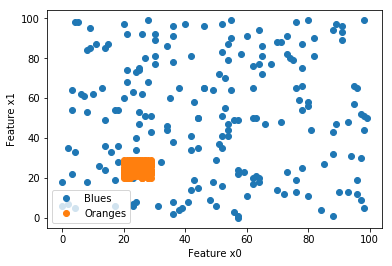

In [52]:
plt.plot(X[:N,0], X[:N,1], 'o', label = 'Blues') # blues first N
plt.plot(X[N:,0], X[N:,1], 'o', label = 'Oranges') # oranges last N
plt.legend()
plt.xlabel('Feature x0')
plt.ylabel('Feature x1')
plt.show()

In [45]:
X.shape

(400, 2)

In [46]:
y.shape

(400, 1)

In [53]:
from sklearn import neighbors, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluation

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

# Scaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Apply ML
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
# Learn best parameters
knn.fit(X_train, y_train)
# Prediction
y_pred = knn.predict(X_test)
# Evaluation
accuracy_score(y_test, y_pred)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


0.98

In [54]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluation

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

# Scaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



# Apply ML
lr = LinearRegression(normalize=True)
# Learn best parameters
lr.fit(X_train, y_train)
# Prediction
y_pred = lr.predict(X_test)
# Evaluation
#accuracy_score(y_test, y_pred)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [55]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5182515080060466

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, stratify=y)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression(penalty='l2')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.86


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=cl,
        edgecolor='black')

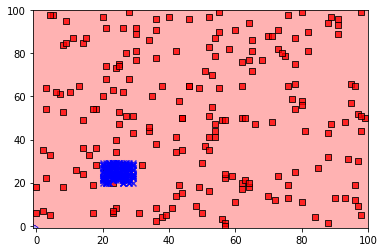

In [61]:
plot_decision_regions(X, y.flatten(), classifier=model)

In [62]:
y_pred

array([1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.])